In [1]:
from shared.preface import *
import shared.functions as fct


# Load data.
nus = 10000
MW_HALO = True
VC_HALO = False
AG_HALO = False
halos = 'MW'*MW_HALO + '+VC'*VC_HALO + '+AG'*AG_HALO
u_all = fct.load_u_sim(nus, halos)

## Clustering factors vs. mass.

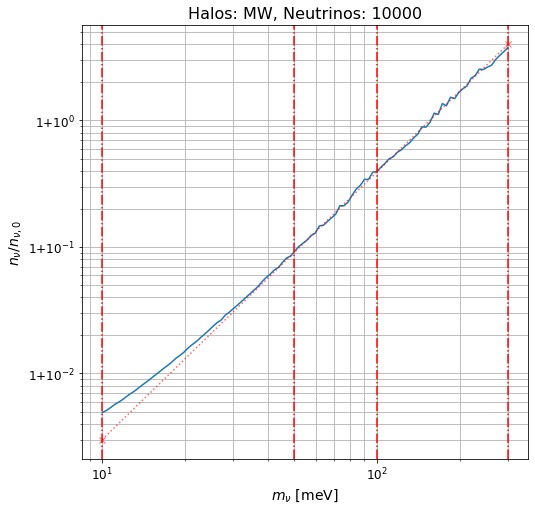

Max value: 4.774666907932471 3.7746669079324713


In [2]:
def number_density_1_mass(m_nu_eV, average:bool):

    n_nus = np.zeros(len(m_nu_eV))
    for i, m_eV in enumerate(m_nu_eV):

        # Get momenta.
        p, _ = fct.u_to_p_eV(u_all, m_eV)

        if average and m_eV >= 0.1:
            # Calculate number density, values are averaged for z in [3.5, 4].
            idx = np.array(np.where(ZEDS >= 3.5)).flatten()

            temp = np.zeros(len(idx))
            for j,k in enumerate(idx):
                val = fct.number_density(p[:,0], p[:,k])
                temp[j] = val

            n_nus[i] = np.mean(temp)

        else:
            n_nus[i] = fct.number_density(p[:,0], p[:,-1])

    np.save(
        f'neutrino_data/clustering_factors_nus_{nus}_halos_{halos}.npy', 
        n_nus
        )


# 10 to 300 meV like in the paper.
mass_range_eV = np.geomspace(0.01, 0.3, 100)*eV

number_density_1_mass(mass_range_eV, average=True)
n_nus = np.load(
    f'neutrino_data/clustering_factors_nus_{nus}_halos_{halos}.npy'
    )/N0

# Plotting:
fig, ax = plt.subplots(1,1, figsize=(8,8))

ax.plot(mass_range_eV*1e3, (n_nus-1))
x_ends = [1e1, 3*1e2]
y_ends = [3*1e-3, 4]
ax.plot(x_ends, y_ends, marker='x', ls=':', c='r', alpha=0.6)

for m in NU_MASSES:
    ax.axvline(m*1e3, c='r', ls='-.')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title(f'Halos: {halos}, Neutrinos: {nus}')
ax.set_xlabel(r'$m_{\nu}$ [meV]')
ax.set_ylabel(r'$n_{\nu} / n_{\nu, 0}$')
# ax.set_ylim(1e-3, 1e1)
plt.grid(True, which="both", ls="-")

ax.yaxis.set_major_formatter(ticker.FuncFormatter(fct.y_fmt))

plt.savefig(f'figures/clustering_factors_nus_{nus}_halos_{halos}.pdf')
plt.show()

print('Max value:', np.max(n_nus), np.max(n_nus-1))

### Visualizing the neutrino trajectories.

In [ ]:
from shared.preface import *
import shared.functions as fct

# Positions of all neutrinos.
nus = 1000
MW_HALO = True
VC_HALO = True
AG_HALO = False
halos = 'MW'*MW_HALO + '+VC'*VC_HALO + '+AG'*AG_HALO
x_all = fct.load_x_sim(nus, halos)/1e3

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

selection = np.arange(nus)[1::100]
print(selection)

for i in selection:

    # Positions of 1 neutrino.
    x_nu1 = x_all[i,:]
    x, y, z = x_nu1[:,0], x_nu1[:,1], x_nu1[:,2]

    if i==0:
        print(x[0])

    ax.plot3D(x, y, z, alpha=0.5)



ax.scatter3D(
    X_VC[0]/1e3, X_VC[1]/1e3, X_VC[2]/1e3, s=300, c='r', label='Virgo Cluster'
    )

ax.scatter3D(
    0.,0.,0., s=10, c='k', label='Galactic Center'
    )

# ax.scatter3D(
#     X_AG[0]/1e3, X_AG[1]/1e3, X_AG[2]/1e3, s=200, c='b', label='M31'
#     )

# Seeing Virgo Cluster.
# ax.set_xlim(-5,5)
# ax.set_ylim(-5,5)
# ax.set_zlim(0,20)


# Zoom-in on Sun-GC system.
zoom = 1
ax.set_xlim(-zoom,zoom)
ax.set_ylim(-zoom,zoom)
ax.set_zlim(-zoom,zoom)

ax.set_xlabel('x-axis (Mpc)')
ax.set_ylabel('y-axis (Mpc)')
ax.set_zlabel('z-axis (Mpc)')

plt.legend()
plt.show()

## Redshift dependence (Fig. 4 Mertsch et al. (2020)).

Max: 1.0049150320877198 Mean: 1.0048504681392119
Max: 1.093904642277811 Mean: 1.0848497851956767
Max: 1.4228457157712735 Mean: 1.3465848801885005
Max: 5.916621183248944 Mean: 4.201436031233759


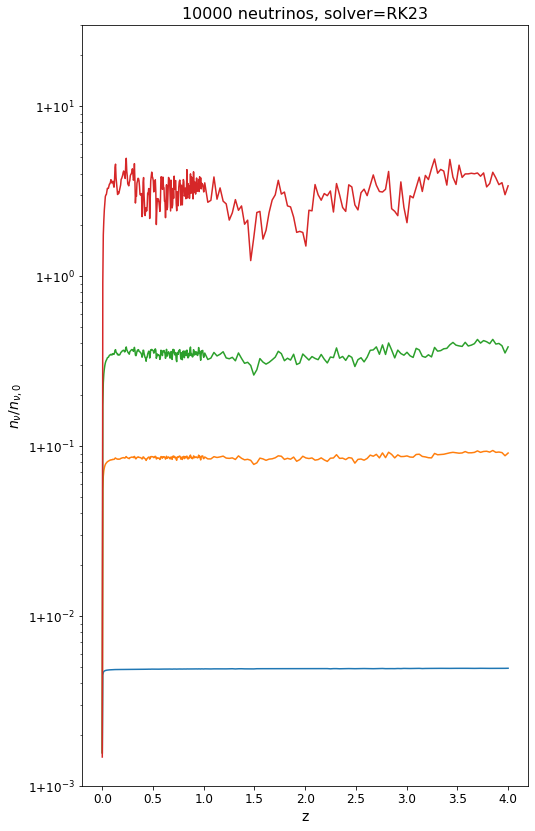

In [3]:
def n_nu_of_redshift(m_eV):
    
    # Convert to momenta. 
    p, _ = fct.u_to_p_eV(u_all, m_eV)
    #NOTE: has (10000, 100) shape, ndim = 2

    n_nus = np.zeros(len(ZEDS))
    for i, _ in enumerate(ZEDS):

        # Calculate number density.
        n_nus[i] = fct.number_density(p[:,0], p[:,i])

    np.save(
        f'neutrino_data/z_dependence_nus_{nus}_halos_{halos}_{m_eV}eV.npy', 
        n_nus
        )


# Plotting.
fig, ax = plt.subplots(1,1, figsize=(8,14))

for j, m in enumerate(NU_MASSES):
    n_nu_of_redshift(m)

    n = np.load(
        f'neutrino_data/z_dependence_nus_{nus}_halos_{halos}_{m}eV.npy'
        )/N0
    print('Max:', np.max(n),'Mean:', np.mean(n))

    ax.semilogy(ZEDS, n-1)

ax.set_title(f'{nus} neutrinos, solver={SOLVER}')
ax.set_xlabel('z')
ax.set_ylabel(r'$n_{\nu} / n_{\nu, 0}$')
ax.set_ylim(1e-3, 3e1)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(fct.y_fmt))
plt.savefig(f'figures/z_dependence_nus_{nus}_halos_{halos}.pdf')
plt.show()

## 

In [ ]:
# Position of earth w.r.t Milky Way NFW halo center.
x1, x2, x3 = 8.5, 0., 0.
x0 = np.array([x1, x2, x3])

def momentum_shape(m_eV):

    # Convert to momenta.
    p, y = fct.u_to_p_eV(u_all, m_eV)
    p0, p1, y0 = p[:,0], p[:,-1], y[:,0]

    # Sort.
    order = p0.argsort()
    p0_sort, p1_sort = p0[order], p1[order]

    # Fermi-Dirac values with momentum at end of sim.
    FDvals = fct.Fermi_Dirac(p1_sort)

    FDvals0 = fct.Fermi_Dirac(p0_sort)

    return p0_sort, FDvals, y0[order], FDvals0


fig, axs = plt.subplots(2,2, figsize=(12,12))
fig.suptitle(
    'Integrand for number density (np.trapz)' 
    '\n'
    f'{nus} neutrinos',
    fontsize=18)

for j, m in enumerate(NU_MASSES):
    p0_sort, FDvals, y0, FDvals0 = momentum_shape(m)
    y_pback = FDvals * p0_sort**2
    y_ptoday = FDvals0 * p0_sort**2
    # print(y0[0], y0[-1])

    n_check = np.trapz(y_pback, p0_sort)
    print(n_check/Pi**2*cm**3/N0)

    i = 0
    if j in (2,3):
        i = 1
        j -= 2

    yOG = np.linspace(LOWER, UPPER, len(y0))

    axs[i,j].plot(y0, y_pback, label=r'with F($p_{back}$)')
    axs[i,j].plot(y0, y_ptoday, label=r'with F($p_{today}$)')
    axs[i,j].set_title(f'{m} eV')
    axs[i,j].set_xlabel(r'$p_{today}$ / $T_{\nu ,today}$')
    axs[i,j].set_ylabel(r'$p_{today}^2 \cdot$ FD($p_{back}$)')

    # Escape momenta.
    _, y_esc = fct.escape_momentum(x0, 0., rho0_MW, Mvir_MW, m)
    axs[i,j].axvline(y_esc, c='r', ls='-.', label=r'$p_{esc}$')

    axs[i,j].set_xlim(0,10)
    axs[i,j].set_ylim(y_pback[0], np.max(y_pback))
    axs[i,j].legend()

plt.savefig('figures/momenta_for_n_intergral.pdf')
plt.show()

## Fermi-Dirac shape.

In [ ]:
# Position of earth w.r.t Milky Way NFW halo center.
x1, x2, x3 = 8.5, 0., 0.
x0 = np.array([x1, x2, x3])

fig, axs = plt.subplots(2,2, figsize=(12,12))
fig.suptitle(
    'Momentum phase-space distributions' 
    '\n'
    f'({nus} neutrinos)',
    fontsize=18)

for j, m_eV in enumerate(NU_MASSES):

    k = j

    # Convert to momenta.
    p, y = fct.u_to_p_eV(u_all, m_eV)
    p0, p1, y0, y1 = p[:,0], p[:,-1], y[:,0], y[:,-1]

    # Sort.
    order = p0.argsort()
    p0_sort, p1_sort = p0[order], p1[order]
    y0_sort, y1_sort = y0[order], y1[order]

    # Each velocity has a batch of neutrinos!
    # Take min. of each to represent most clustered ones.
    p1_blocks = p1_sort.reshape((Vs, PHIs*THETAs))
    p1_smooth = np.min(p1_blocks, axis=1)
    y0_blocks = y0_sort.reshape((Vs, PHIs*THETAs))
    y0_smooth = y0_blocks[:,0]

    # Fermi Dirac of the smoothed final momenta.
    FDvals = fct.Fermi_Dirac(p1_smooth)

    i = 0
    if j in (2,3):
        i = 1
        j -= 2
    
    # Escape momentum.
    p_esc_eV, y_esc = fct.escape_momentum(x0, 0., rho0_MW, Mvir_MW, m_eV)
    axs[i,j].axvline(y_esc, c='k', ls='-.', label='y_esc')

    # Original Fermi-Dirac distr.
    pOG = np.geomspace(LOWER, UPPER, len(FDvals))
    FDvalsOG = fct.Fermi_Dirac(pOG)
    yOG = pOG/T_CNB

    axs[i,j].loglog(y0_smooth, FDvals, label='Simulation', c='red', alpha=0.6)
    axs[i,j].loglog(yOG, FDvalsOG, label='Fermi-Dirac', c='blue')
    axs[i,j].set_title(f'{m_eV} eV')
    axs[i,j].set_ylabel('FD(p)')
    axs[i,j].set_xlabel(r'$y = p / T_{\nu,0}$')
    axs[i,j].legend(loc='lower left')
    axs[i,j].set_ylim(1e-5, 1e0)
    axs[i,j].set_xlim(1e-2, 1e2)


plt.savefig(f'figures/fermi_dirac_nus_{nus}_halos_{halos}.pdf')
plt.show()

## Initial and final momenta.

In [ ]:
def escape_momentum(x_i, z, rho_0, M_vir, masses):

    masses_eV = masses*unit.eV
    x_i_kpc = x_i*kpc

    # Gravitational potential at position x_i.
    grav = fct.grav_pot(x_i_kpc, z, rho_0, M_vir) / (m**2/s**2)
    grav_eV = grav*unit.m**2/unit.s**2
    T_CNB_eV = T_CNB*unit.eV

    # Escape momentum formula from Ringwald & Wong (2004).
    p_esc = np.sqrt(2*np.abs(grav_eV)) * masses_eV.to(unit.kg, unit.mass_energy())
    p_esc_eV = ((p_esc * const.c).to(unit.J)).to(unit.eV)
    y_esc = (p_esc_eV/T_CNB_eV).value

    return p_esc, y_esc


# Position of earth w.r.t Milky Way NFW halo center.
x1, x2, x3 = 8.5, 0., 0.
x0 = np.array([x1, x2, x3])

fig, axs = plt.subplots(2,2, figsize=(12,10))
fig.suptitle(
    'Initial and final momenta (sorted)' 
    '\n'
    f'({nus} neutrinos)',
    fontsize=18)

for j, m_eV in enumerate(NU_MASSES):

    # Convert to momenta.
    p, y = fct.u_to_p_eV(u_all, m_eV)
    p0, p1, y0, y1 = p[:,0], p[:,-1], y[:,0], y[:,-1]

    # Sort.
    order = p0.argsort()
    p0_sort, p1_sort = p0[order], p1[order]
    y0_sort, y1_sort = y0[order], y1[order]

    i = 0
    if j in (2,3):
        i = 1
        j -= 2
    
    # Escape momentum.
    p_esc_eV, y_esc = escape_momentum(x0, 0., rho0_MW, Mvir_MW, m_eV)
    axs[i,j].axhline(y_esc, c='k', ls='-.', label='y_esc')

    # Average momenta below escape momentum.
    #?

    x = np.arange(nus)
    axs[i,j].semilogy(x, y0_sort, label='initial momentum')
    axs[i,j].semilogy(x, y1_sort, label='final momentum', alpha=0.6)
    axs[i,j].set_title(f'{m_eV} eV')
    axs[i,j].set_xlabel('Neutrino number')
    axs[i,j].set_ylabel(r'$p / T_{\nu,0}$')
    axs[i,j].legend(loc='lower right')

plt.show()